### 선형 모델
#### 선형 회귀 모델

$y = ax1 + bx2 + cx3 + d$


$y = WX + b$

linear_regression 
- 반드시 scaling이 필요!

w[0]: 0.393906  b: -0.031804


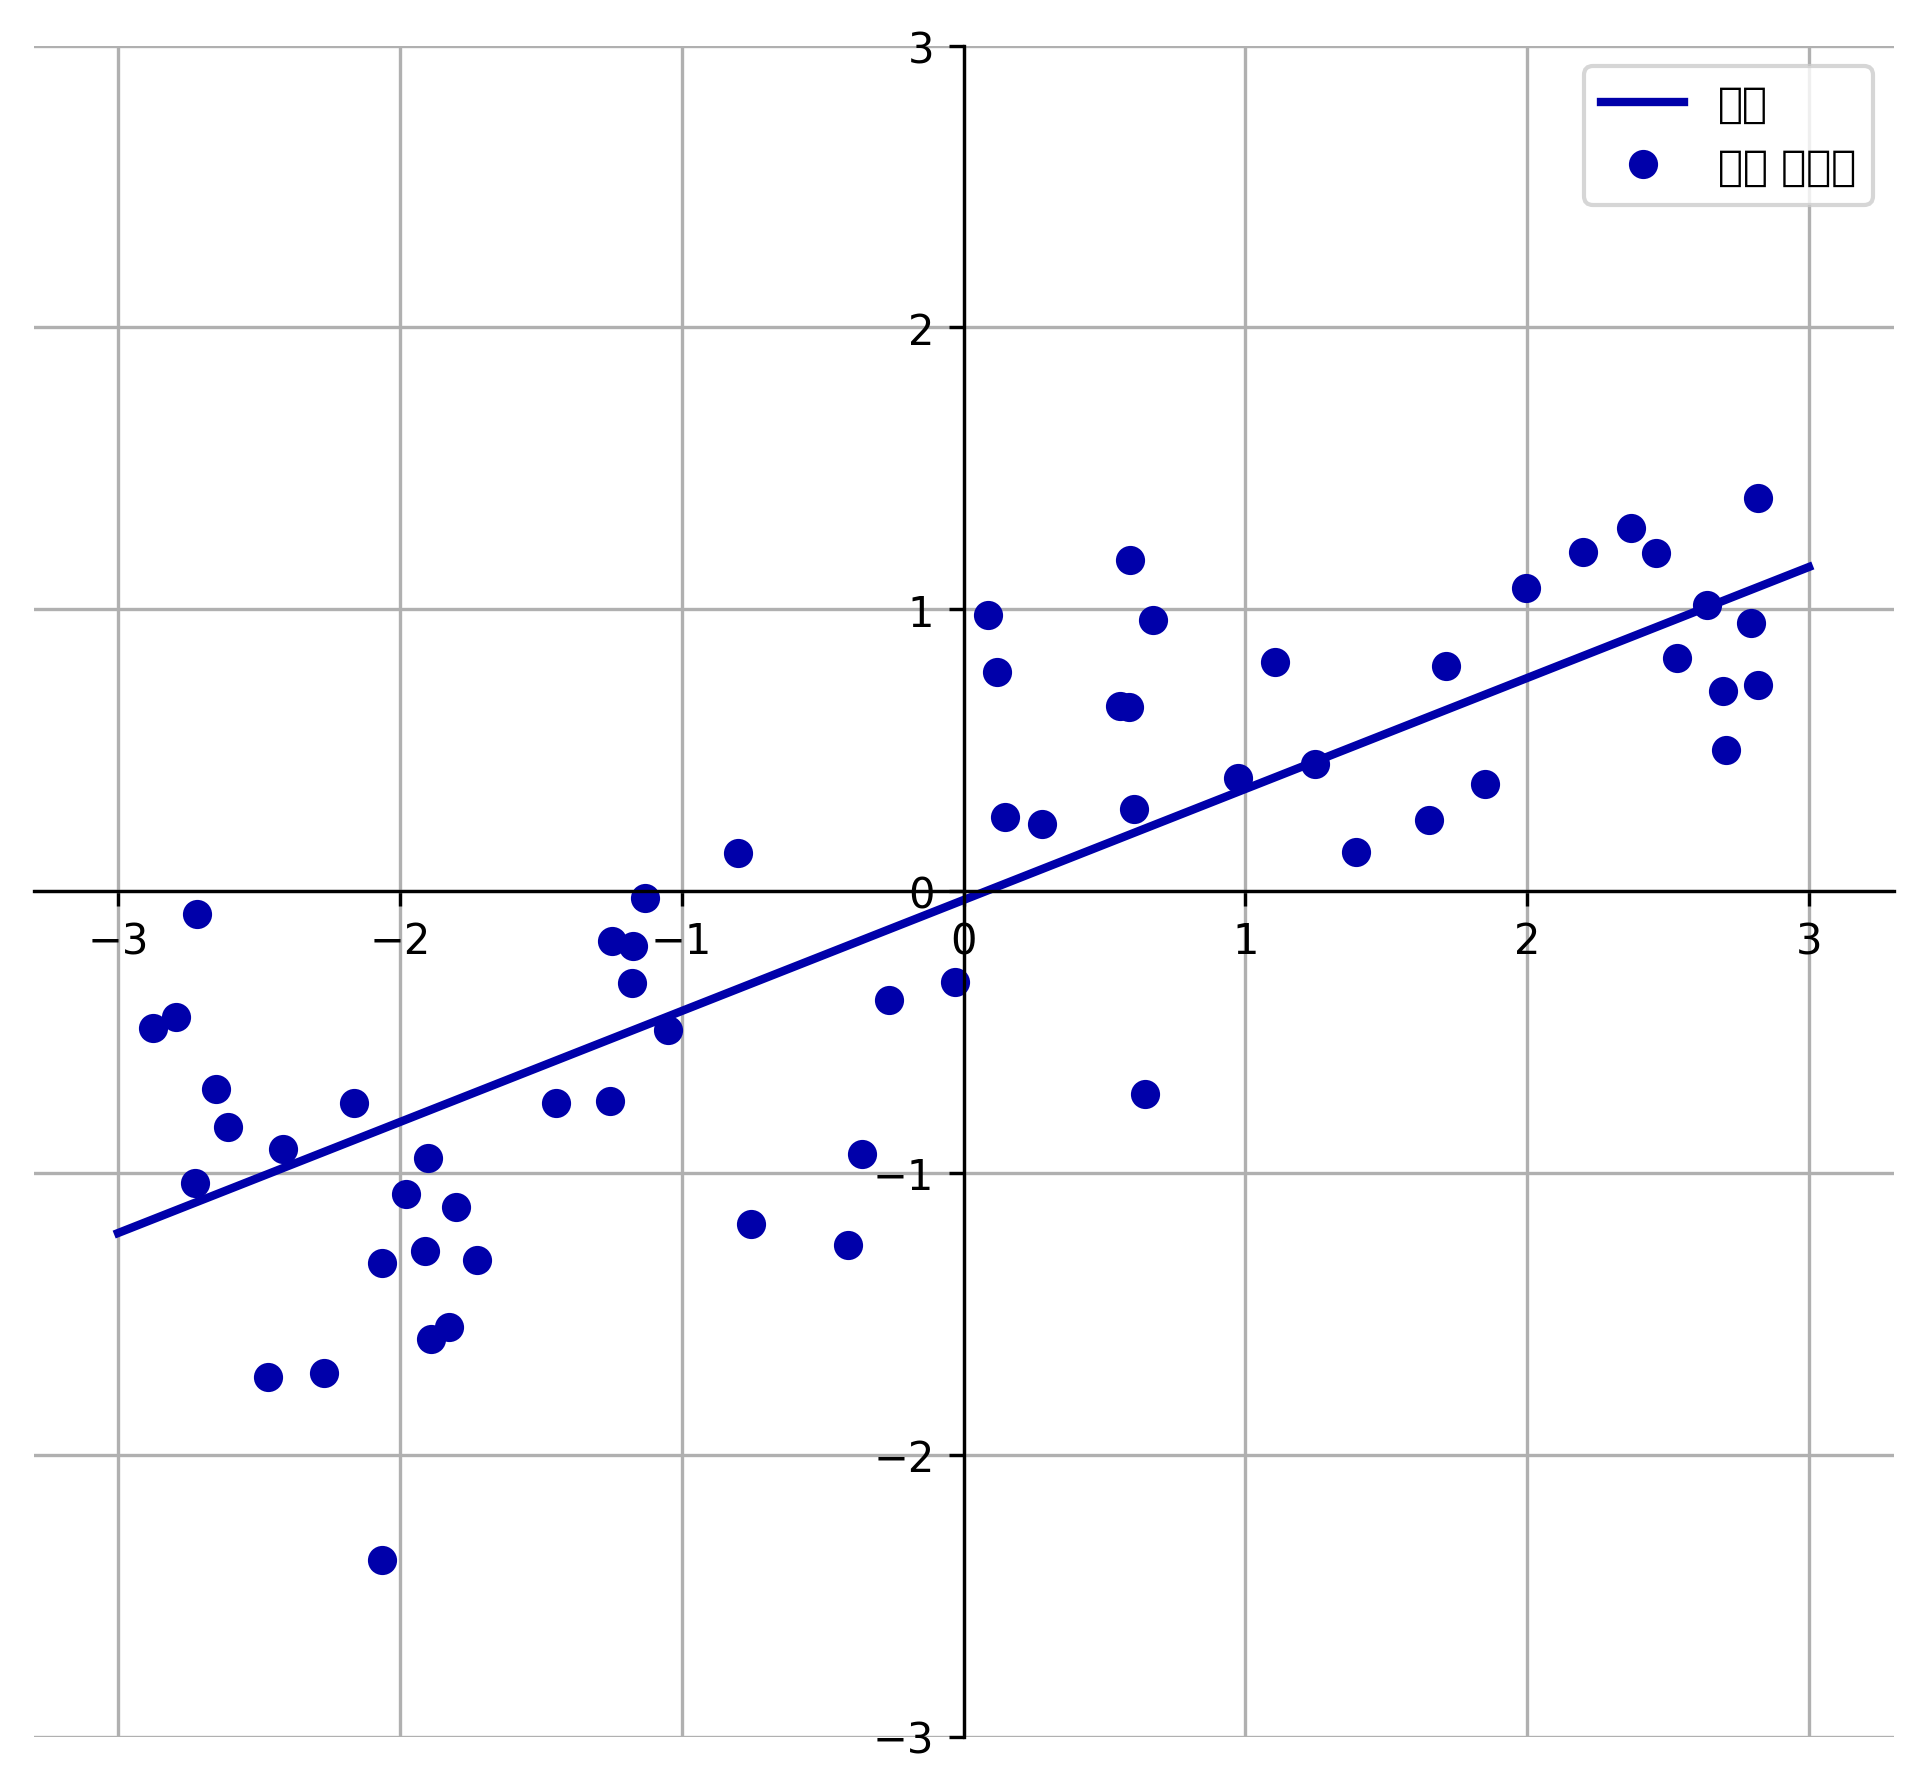

In [178]:
# 샘플 데이터
mglearn.plots.plot_linear_regression_wave()
# w[0]:기울기

- 직선형 모델이 많은 정보를 잃는 것처럼 보이지만 특성(피처)가 하나가 아니므로 (보통 수~수백개) 이들의 선형 조합은 충분히 잘 동작한다.

### 손실함수

- 최소제곱법을 가장 많이 사용한다
- MSE를 최소화 하는 것을 목표로 한다 (예측 오차의 자승의 평균치)
- 아래는 모델을 선형회귀로 선택하고, 훈련데이터로 학습(fit) 시키는 코드이다
- 시스템이 구한 내부 변수는 뒤에 "_"를 붙인 것이 많다

In [179]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [180]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [181]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
#훈현세트와 테스트세트의 점수가 매우 비슷 -> 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- score가 0.66이면 성능이 좋은 것은 아니다
- make_wave() 데이터 자체가 상관관계가 높지 않다 (오차가 크다)
- 보스턴 주택가격 데이터 사용예 (확장된 피처를 사용했다)

## 릿지 회귀

- 일반적인 선형회귀에 추가로 제약을 가한 것(과대적합을 막기 위해), 트레인 데이터가 적을 때 사용
- 가중치의 절대값을 가능한 작게 제한 함. 즉 전체적으로 계수의 크기가 작게 만드는 것 
- 또는 모든 계수들을 골고루 반영되게 하는 효과를 얻음
- Regularization으로 L2 규제에 해당한다 (규제란 과적합을 막기 위해서 필요한 제한을 말한다)
- L2의 제곱을 페널티로 사용한다 (알파 계수)
- 알파값이 클수록 제약을 크게 정한 것으로 계수의 값이 작아진다

## 일반화의 방법

In [185]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 리지 모델를 사용하여 테스트 점수가 높아진 것을 알 수 있다.
- 규제화를 하는 정도를 알파 값을 바꾸면서 여러가지로 확인해볼 수 있다.
- 규제를 많이 할수록 일반화는 유리하나 성능이 떨어지는 단점이 있다
- 아래는 알파를 10, 0.1 등으로 바꾸어 보았다

In [186]:
alpha_list = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100]

In [187]:
for al in alpha_list:
    ridge10 = Ridge(al).fit(X_train, y_train)
    print ("알파 = ",  al)
    print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
    print("        테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

알파 =  0.0001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.62
알파 =  0.001
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.63
알파 =  0.005
훈련 세트 점수: 0.95
        테스트 세트 점수: 0.67
알파 =  0.01
훈련 세트 점수: 0.94
        테스트 세트 점수: 0.70
알파 =  0.05
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.76
알파 =  0.1
훈련 세트 점수: 0.93
        테스트 세트 점수: 0.77
알파 =  1
훈련 세트 점수: 0.89
        테스트 세트 점수: 0.75
알파 =  10
훈련 세트 점수: 0.79
        테스트 세트 점수: 0.64
알파 =  100
훈련 세트 점수: 0.60
        테스트 세트 점수: 0.42


In [214]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.74


### 계수 값 살펴보기
- 여러가지 리지 회귀분석 결과로 얻는 계수를 보면 이들의 특징을 비교하기가 쉽다
- 아래는 계수의 분포를 그리는 코드이다
- 결과를 보면 규제를 많이 할수록(알파가 클수록) 계수들이 작은 값을 갖는다 (큰 차이가 없게 편차를 줄인 효과이다)

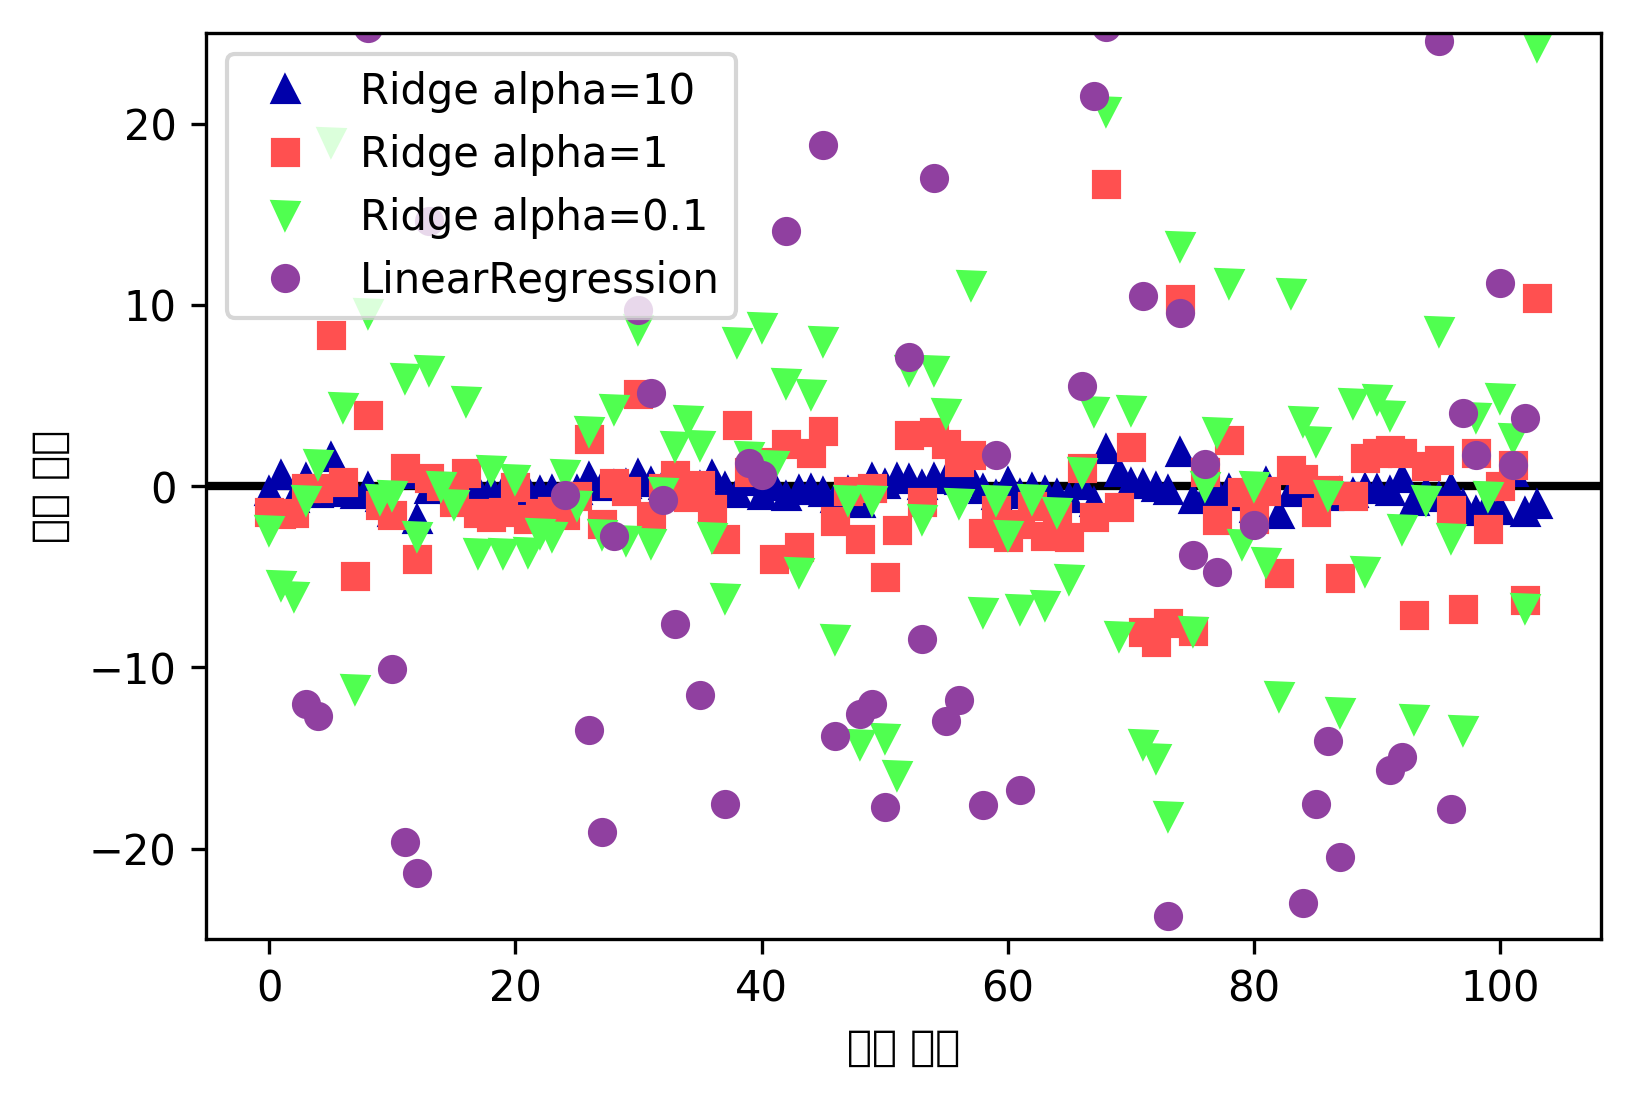

In [189]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- 훈련 데이터 수를 늘이면 어떤 차이가 나타나는가?
- 학습데이터를 늘리면서 나타나는 학습결과를 그려보는 것을 학습곡선이라고 한다 (learning curve)
- 아래 결과를 보면 리지 알고리즘의 성능이 일반 선형회귀보다 매우 좋은 것을 알 수 있다
- 그러나 데이터의 규모가 커지면 규제항이 덜 중요해져서 릿지 회귀의 성능이 선형회귀와 같아진다 (데이터가 많아질수록 모델이 데이터를 기억하거나 과적합하기가 어렵다)

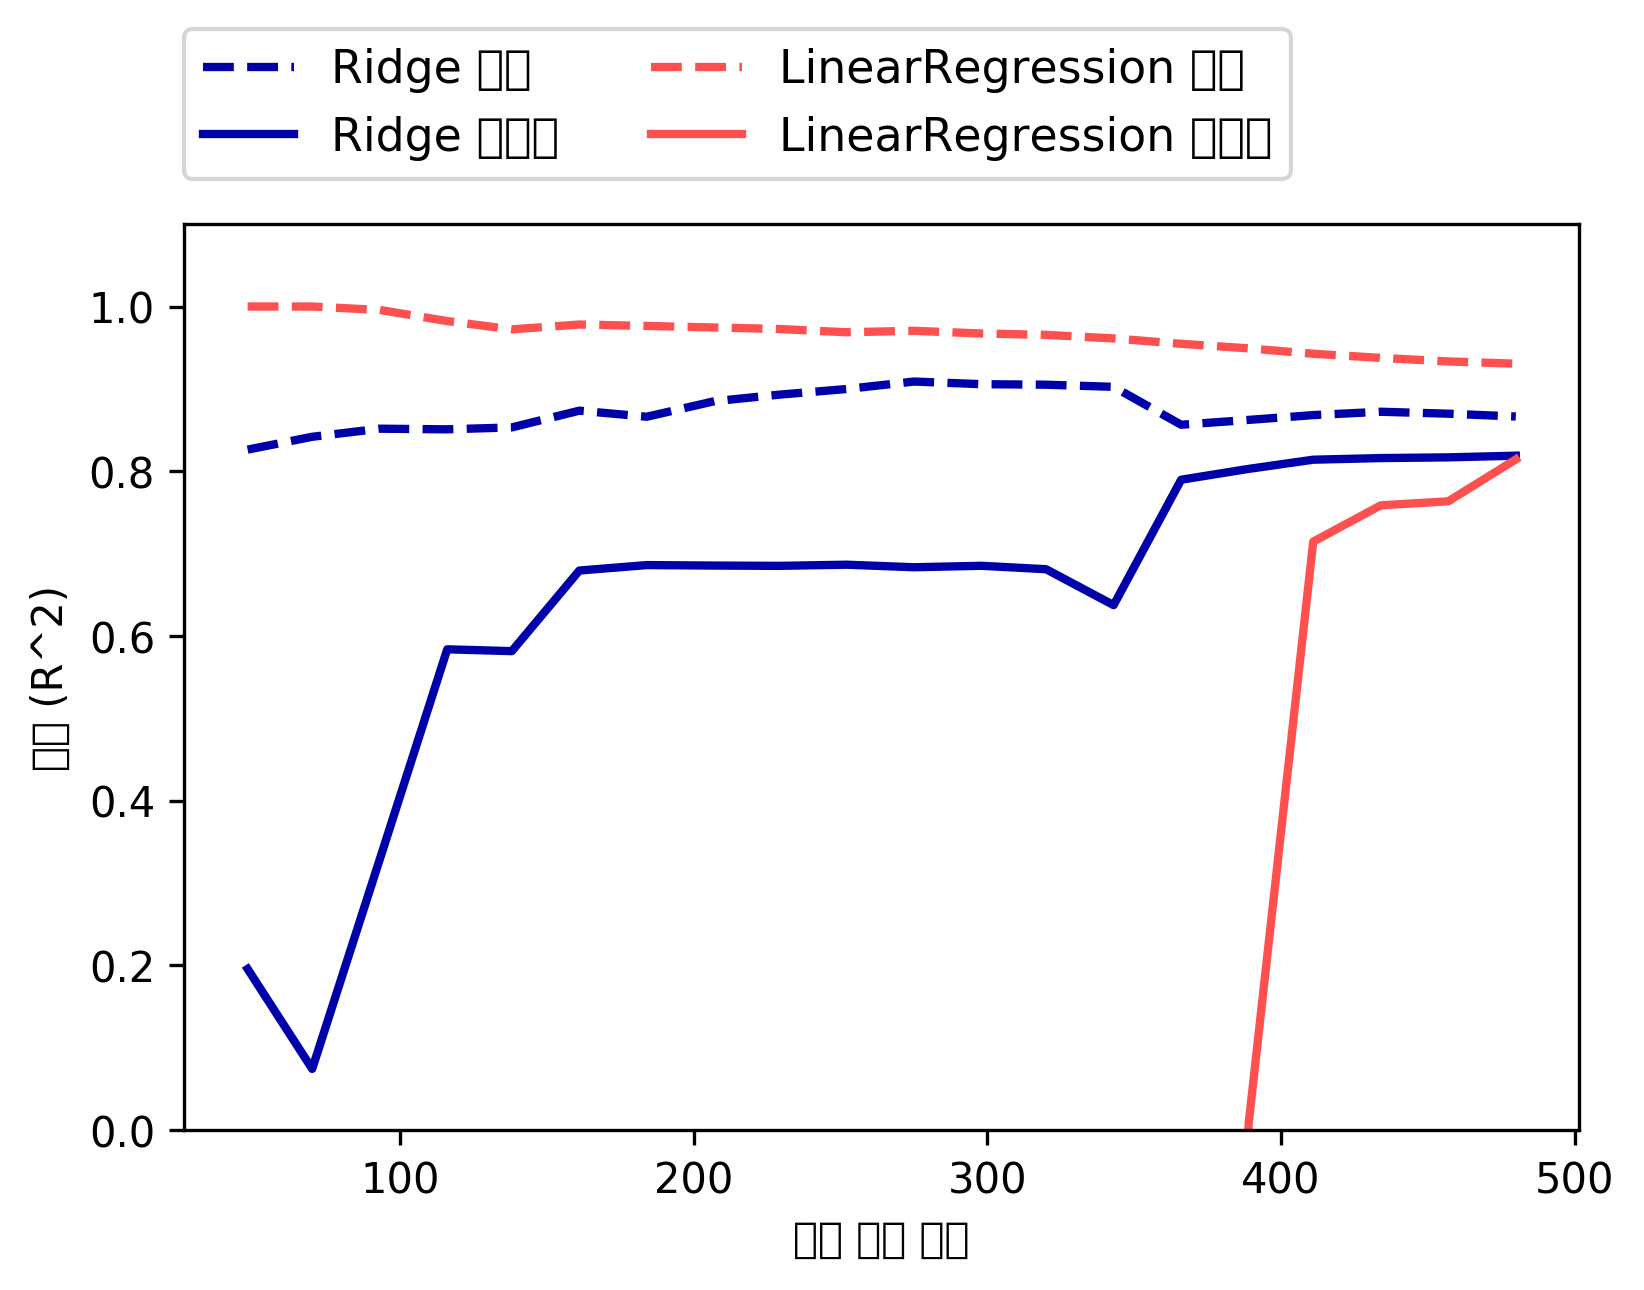

In [190]:
mglearn.plots.plot_ridge_n_samples()

### Lasso 규제
- 릿지 회귀처럼 계수의 크기를 최소화 한다. 단 L1 규제를 사용한다.
- 일부 계수는 0으로 수렴해버리므로 특성 선택이 자동으로 이루어지는 셈이 된다
- **모델을 이해하기 쉬워지고 어떤 특성이 중요한지를 파악하기 쉬워진다** --> 특성 선택의 효과

- 훈련데이터와 테스트 데이터에 대해 score가 비슷하면 과소적합이다(중요)
- 데이터 전처리에 쓰여 중요한 특성을 파악하는 목적으로 쓰이기도 한다.

In [220]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.54
테스트 세트 점수: 0.53
사용한 특성의 개수: 3


- 라소로 다른 특성이 다 잘려서 100여개의 특성 중 4개만 쓰이게 되었다. 이 경우 알파값을 바꿔서 조정해줘야한다.(기본 알파값은 1이다.)
- 이때 알파값을 너무 작게 조정하면(제약을 너무 적게 주면) 결국 linear regression과 다를 바가 없어진다.

In [221]:
print(lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


- 위의 결과를 보면 겨우 4개의 특성만 사용함으로써 성능이 좋지 않은 것을 알 수 있다.(알파값이 현재 1로 설정되어 있다)
- 알파값을 0.01로 바꾸어 보겠다. (특성을 33개 사용하고 성능도 좋아졌다)


In [222]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다, 반복하라는 의미이다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.69
테스트 세트 점수: 0.70
사용한 특성의 개수: 8


In [223]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.74
사용한 특성의 개수: 23


Text(0,0.5,'계수 크기')

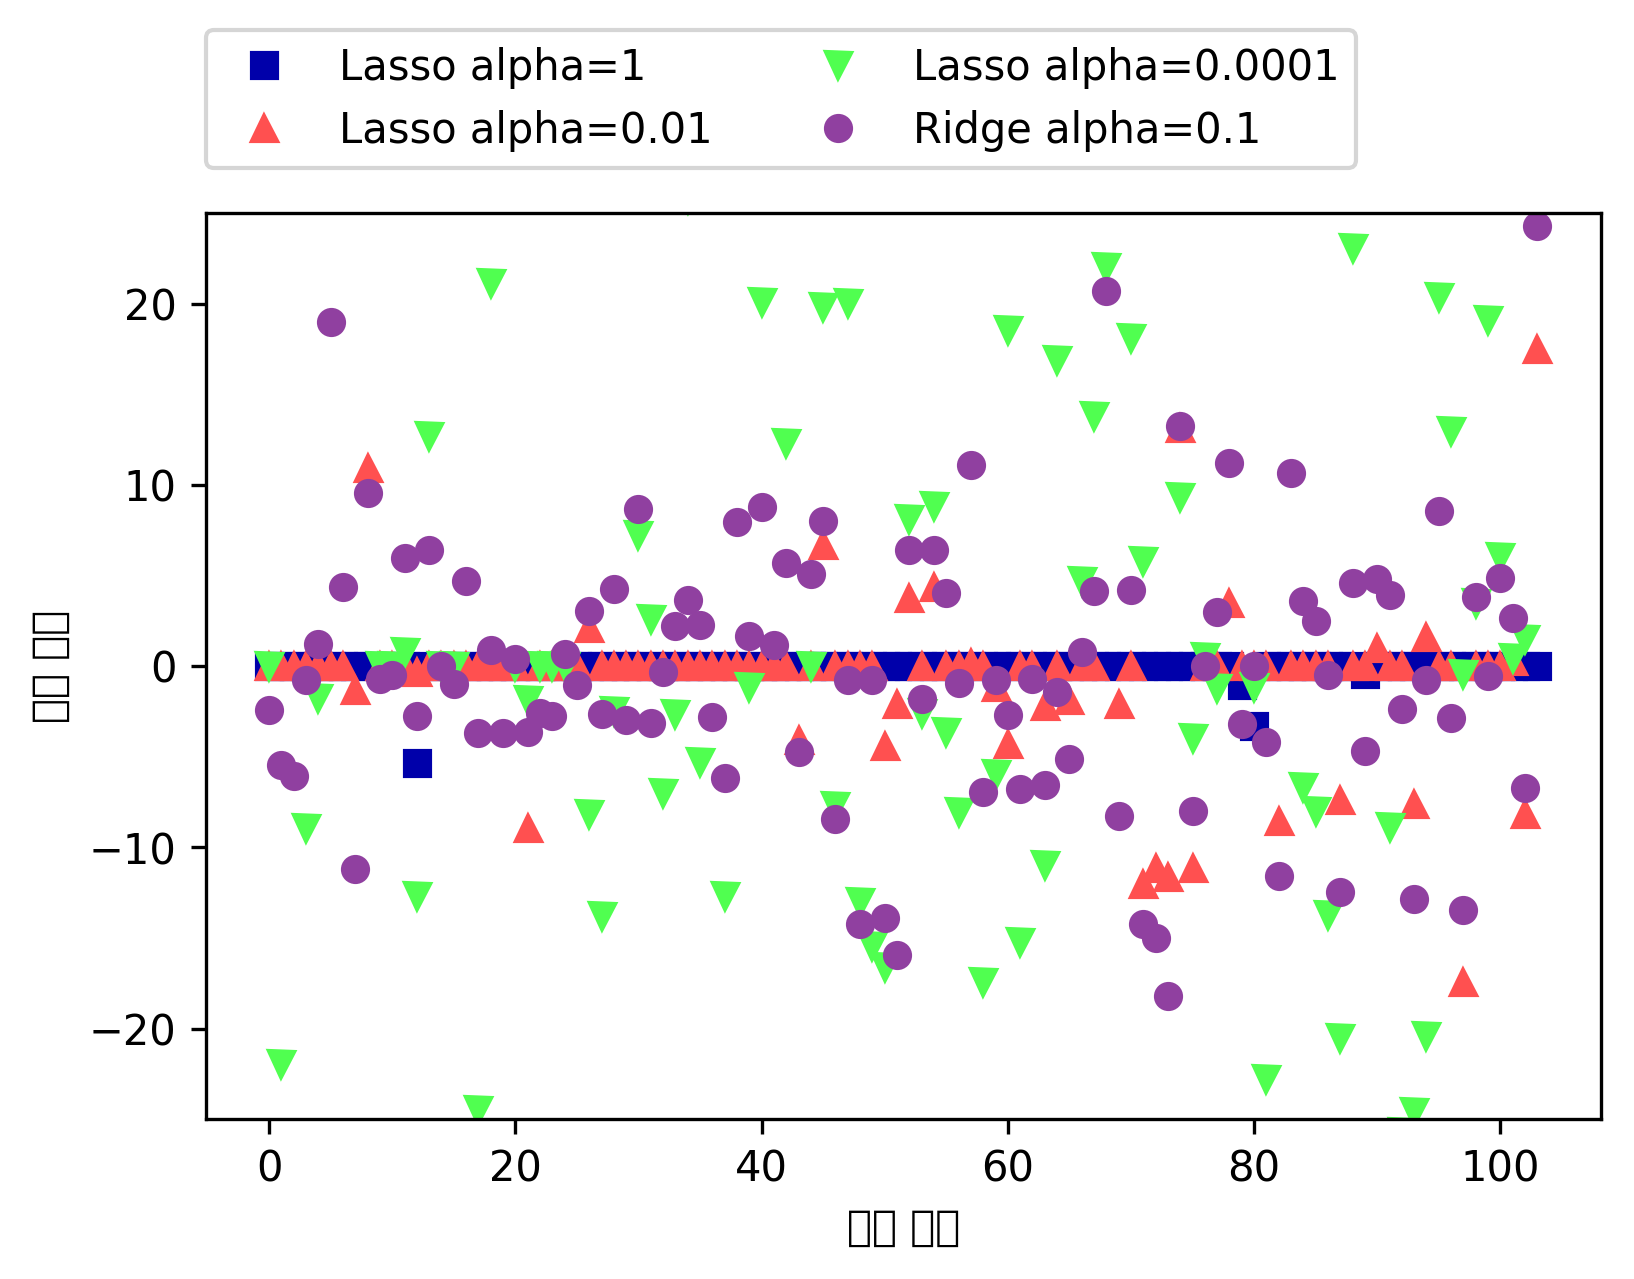

In [195]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

- 일반적으로 릿지 알고리즘이 널리 사용된다.
- 라소는, 특징의 갯수를 줄이려고 할 때 사용된다 (모델을 간단하게 만들어 해석을 쉽게 하게 해준다)
- 많은 특성 중 일부만 중요하다고 판단되거나, 분석하고 이해하기 쉬운 모델을 원할 때는 라쏘를 사용